In [15]:
import pandas as pd


X = pd.read_csv('media.csv',sep=';',encoding = "ISO-8859-1")

print X.keys()

Index([  u'id_media',  u'id_author',  u'TS_upload',     u'tagset',
            u'likes',   u'comments', u'Unnamed: 6'],
      dtype='object')


In [16]:
tags = X['tagset']
#tags = [item for sublist in tags for item in sublist]



In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()

vect.fit(tags)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [22]:
print vect.idf_.shape
print X.shape[0]

(286324,)
1760855


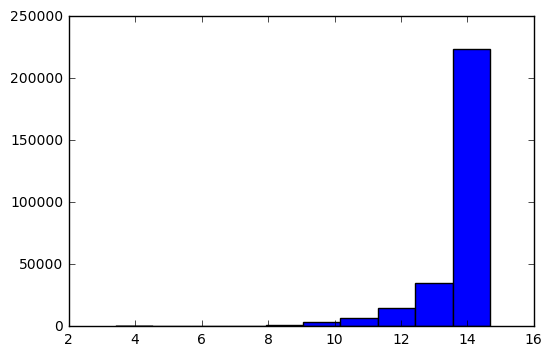

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(vect.idf_)
plt.show()

In [31]:
import nltk


#tok = [nltk.word_tokenize(s) for s in tags]
#tok = [item for sublist in tok for item in sublist]

word_freq = {}

for s in tags:
    
    if s.isdigit():
        continue
        
        
    tokens = s.split(',')
    
    for tok in tokens:
        if tok not in word_freq:
            word_freq[tok] = 1
        else:
            word_freq[tok] =word_freq[tok] +1
            
            


{u'lookingbackgram': 12, u'igresisrael': 4, u'jj_calilove_signs': 5, u'billycorgan': 9, u'vespasuper': 1, u'nunnery': 2, u'loveinpieces': 3, u'sky_addictin': 2, u'todyefor': 2, u'\xe3\x83?\xe3\x83\xa0\xe3\x82\xb9\xe3\x82\xbf\xe3\x83\xbc': 1, u'mdbw': 1044, u'woods': 1722, u'spiders': 30, u'woody': 43, u'areyouready': 2, u'inub15513': 2, u'rastadave': 1, u'torontovsicepellets2013': 1, u'canes': 3, u'lillestr\xc3\xb8m': 1, u'igwalkholland01': 10, u'unclebills': 2, u'central_st_giles': 2, u'caffeto': 1, u'mobilefineart': 16, u'palazzinamajani': 1, u'gettinjiggywidit': 1, u'billysinging': 1, u'taxdollarsatwork': 1, u'thefewtheproud': 1, u'sunsentinal': 21, u'brandenharvey': 34, u'heyfred_simpleisbeautiful': 1, u'touristen': 1, u'refla5h0063minimalblues': 15, u'21wedlove': 1, u'therewasaspotternearby': 1, u'instagoodlife': 1, u'presidentstyle': 1, u'screaming': 6, u'\xd7?\xd7\xa0\xd7\x99\xd7\xa6\xd7\x99\xd7\xa4\xd7\x95\xd7\xa8\xd7\xa9\xd7\x97\xd7\x95\xd7\xa8\xd7\x94\xd7\x95\xd7\x9b\xd7\xa8\

In [34]:
most_used = filter(lambda x: x[1] > 200, word_freq.items())
print len(most_used)

4330


In [35]:
most_used


[(u'mdbw', 1044),
 (u'woods', 1722),
 (u'wooden', 285),
 (u'wednesday', 312),
 (u'kidstagram', 492),
 (u'ig_thailandia', 287),
 (u'kids', 2761),
 (u'95likes', 228),
 (u'sunrays', 462),
 (u'9ofpride', 265),
 (u'fit', 378),
 (u'bestpics', 381),
 (u'poesiadoolhar', 629),
 (u'jj_oregon', 275),
 (u'color_me_minimal', 369),
 (u'iskyhub', 650),
 (u'jj_calilove', 410),
 (u'amselecom', 215),
 (u'nature', 27231),
 (u'mailart', 250),
 (u'instameetbromo', 546),
 (u'adventuretilwedie', 492),
 (u'crowd', 212),
 (u'oceanbeach', 356),
 (u'jj_forum_0790', 220),
 (u'palms', 212),
 (u'igfotogram_4bw', 310),
 (u'4thofjuly', 271),
 (u'chair', 492),
 (u'ic_landscapes', 2523),
 (u'putaplaneonit', 389),
 (u'globalsunsets', 219),
 (u'surfing', 380),
 (u'instagramsa', 226),
 (u'ocolors', 225),
 (u'honduras', 821),
 (u'lxmasters', 424),
 (u'l4l', 774),
 (u'chitown', 459),
 (u'photo_hut', 512),
 (u'instapic', 2755),
 (u'hashtag', 382),
 (u'vanlife', 502),
 (u'sundoors', 238),
 (u'traffic', 756),
 (u'jj_forum_0617

In [98]:

from sklearn.feature_extraction.text import CountVectorizer


tags = filter(lambda x: not x.isdigit(), tags)

def co_occurance_mat(tags):
    
    vect = CountVectorizer(min_df=1000)
    
    X = vect.fit_transform(tags)
    
    Xc = (X.T * X)
    
    return Xc, vect


C , vect = co_occurance_mat(tags)

C = C.toarray()

In [100]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=50)

row_sums = C.sum(axis=1).astype(np.float32)
C_dense = C / row_sums[:, np.newaxis]

pca.fit(C_dense )

print pca.explained_variance_ratio_

[ 0.05353342  0.02961732  0.02528556  0.02340578  0.01981958  0.01948545
  0.01850826  0.0176065   0.01665997  0.01613422  0.01481643  0.01470578
  0.01425823  0.01278251  0.01243016  0.01185412  0.01165004  0.0112027
  0.01041724  0.00915949  0.00865361  0.00813102  0.00803476  0.00789971
  0.00739113  0.0072335   0.00705703  0.00692894  0.00668267  0.00648761
  0.00644329  0.00613194  0.00597502  0.00555409  0.00547608  0.00538351
  0.00515173  0.00504945  0.00502408  0.00482381  0.00477834  0.00448778
  0.0043884   0.00430905  0.00429154  0.00421527  0.00411656  0.0040527
  0.00401449  0.00388394]


In [101]:
y = pca.transform(C_dense)

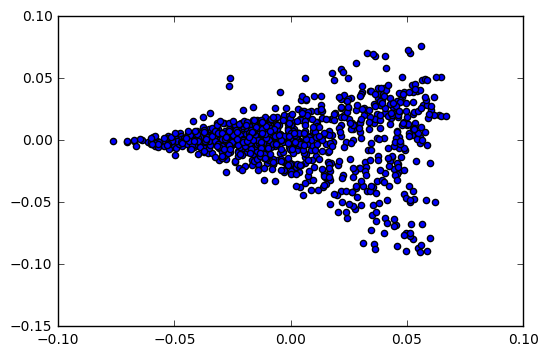

In [102]:
plt.scatter(y[:,0],y[:,1])
plt.show()

In [103]:
row_sums

array([  3800.,  95904.,  58016., ...,  14068.,  26109.,   4977.], dtype=float32)

In [104]:
pca.explained_variance_ratio_.sum()

0.53538378861979508

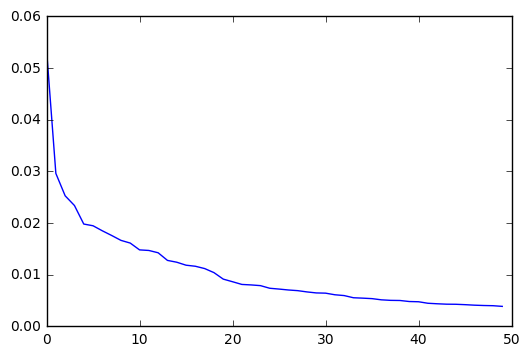

In [105]:
plt.plot(range( len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.show()

In [106]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

dist = squareform(pdist(y, 'euclidean'))

inv_map = {v: k for k, v in vect.vocabulary_.iteritems()} 

n_closest = np.zeros((dist.shape[0] , 5))
#for i in range(y.shape[0]):
for i in range(100):

    #print( [ title_map[int(x)] for x in neighbors[i,0:5] ] )
    #n_closest[i] = heapq.nsmallest(10, dist[i])
    n_closest[i] = np.argsort(dist[i])[:5]
    
    print  inv_map[i], [inv_map[neighbor] for neighbor in n_closest[i] ]
    #print vect.inverse_transform(n_closest[i]),n_closest[i]
    #print n_closest[i]
    #print(i)

1000likes [u'1000likes', u'igersparis', u'paris', u'whpfiftyfifty', u'france']
100likes [u'100likes', u'150likes', u'50likes', u'30likes', u'40likes']
10likes [u'10likes', u'15likes', u'30likes', u'50likes', u'20likes']
110likes [u'110likes', u'90likes', u'80likes', u'70likes', u'60likes']
150likes [u'150likes', u'100likes', u'50likes', u'25likes', u'30likes']
15likes [u'15likes', u'10likes', u'30likes', u'25likes', u'50likes']
16oftheweek [u'16oftheweek', u'justgoshoot', u'ifshowcaseme', u'picfxroundup', u'ampt']
16x9 [u'16x9', u'16x9photography', u'vscogram', u'16x9fordays', u'jjnotforsquares']
16x9fordays [u'16x9fordays', u'jjnotforsquares', u'chasinglight', u'whpstrideby', u'16x9']
16x9photography [u'16x9photography', u'16x9', u'vscogram', u'16x9fordays', u'vscofeature']
200likes [u'200likes', u'100likes', u'150likes', u'300likes', u'50likes']
2012 [u'2012', u'home', u'family', u'instaaddict', u'spring']
20likes [u'20likes', u'10likes', u'30likes', u'15likes', u'amazing']
25likes [

In [91]:
inv_map

{0: u'10',
 1: u'100',
 2: u'1000likes',
 3: u'100likes',
 4: u'10likes',
 5: u'11',
 6: u'110likes',
 7: u'12',
 8: u'13',
 9: u'14',
 10: u'15',
 11: u'150likes',
 12: u'15likes',
 13: u'16',
 14: u'16oftheweek',
 15: u'16x9',
 16: u'16x9fordays',
 17: u'16x9photography',
 18: u'17',
 19: u'18',
 20: u'19',
 21: u'20',
 22: u'200likes',
 23: u'2012',
 24: u'2013',
 25: u'20likes',
 26: u'21',
 27: u'22',
 28: u'23',
 29: u'24',
 30: u'25',
 31: u'25likes',
 32: u'26',
 33: u'27',
 34: u'28',
 35: u'29',
 36: u'2instagood',
 37: u'30',
 38: u'300likes',
 39: u'30likes',
 40: u'31',
 41: u'32',
 42: u'33',
 43: u'34',
 44: u'35',
 45: u'36',
 46: u'37',
 47: u'38',
 48: u'39',
 49: u'40',
 50: u'400likes',
 51: u'40likes',
 52: u'41',
 53: u'42',
 54: u'43',
 55: u'44',
 56: u'45',
 57: u'46',
 58: u'47',
 59: u'48',
 60: u'49',
 61: u'4s',
 62: u'50',
 63: u'500likes',
 64: u'50likes',
 65: u'50moreportraits',
 66: u'51',
 67: u'52',
 68: u'53',
 69: u'54',
 70: u'55',
 71: u'56',
 72

In [108]:
X.iloc[0:10]

id_media  id_author   TS_upload  \
0         0          1  1389964238   
1         1          1  1389840587   
2         2          1  1389624935   
3         3          1  1389624101   
4         4          1  1389168824   
5         5          1  1389024482   
6         6          1  1388826377   
7         7          1  1388761951   
8         8          1  1388598329   
9         9          1  1388507852   

                                            tagset  likes  comments  \
0  bromoijentrip,instasunda,latergram,instamarinda    524      18.0   
1                                              533     15       NaN   
2                                              738     28       NaN   
3                          instasunda,instamarinda    548      17.0   
4                                              623     25       NaN   
5                                        latergram    577      23.0   
6                                              611     19       NaN   
7        flashpackerborneo,instasunda,instamarinda    404      18.0   
8                                              705     53       NaN   
9                                              366     27       NaN   

   Unnamed: 6  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6         NaN  
7         NaN  
8         NaN  
9         NaN

In [128]:
def shift_row(row):

    #if np.isnan(row[ 5]):
    if pd.isnull(row[ 5]):
     
        row[5] = row[4]
        row[4] = row[3]
        row[3] = ''
        
        return row
    
    return row
        
X = X.apply(lambda row: shift_row(row), axis=0)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [129]:
X.iloc[0:1000]

id_media  id_author   TS_upload  \
0           0          1  1389964238   
1           1          1  1389840587   
2           2          1  1389624935   
3           3          1  1389624101   
4           4          1  1389168824   
5           5          1  1389024482   
6           6          1  1388826377   
7           7          1  1388761951   
8           8          1  1388598329   
9           9          1  1388507852   
10         10          1  1388471420   
11         11          1  1388396335   
12         12          1  1388238014   
13         13          1  1388075380   
14         14          1  1387899910   
15         15          1  1387709355   
16         16          1  1387558475   
17         17          1  1387467726   
18         18          1  1387373779   
19         19          1  1387369295   
20         20          1  1387128627   
21         21          1  1386916240   
22         22          1  1386829401   
23         23          1  1386688626   
24         24          1  1386612922   
25         25          1  1386562795   
26         26          1  1386522441   
27         27          1  1386443317   
28         28          1  1386380581   
29         29          1  1386241716   
..        ...        ...         ...   
970       970        389  1359423018   
971       971        389  1359411074   
972       972        389  1359399259   
973       973        389  1359314533   
974       974        389  1359247267   
975       975        389  1359236407   
976       976        389  1359150943   
977       977        389  1359141299   
978       978        389  1359070346   
979       979        389  1358983404   
980       980        389  1358880716   
981       981        389  1358792046   
982       982        389  1358738063   
983       983        389  1358635736   
984       984        389  1358622308   
985       985        389  1358564854   
986       986        389  1358482277   
987       987        389  1358452912   
988       988        389  1358372473   
989       989        389  1358284142   
990       990        389  1358191006   
991       991        389  1358120222   
992       992        389  1358048524   
993       993        389  1358023534   
994       994        389  1357940803   
995       995        389  1357860696   
996       996        389  1357845804   
997       997        389  1357767806   
998       998        389  1357754694   
999       999        389  1357679445   

                                                tagset likes  comments  \
0      bromoijentrip,instasunda,latergram,instamarinda   524      18.0   
1                                                        533      15.0   
2                                                        738      28.0   
3                              instasunda,instamarinda   548      17.0   
4                                                        623      25.0   
5                                            latergram   577      23.0   
6                                                        611      19.0   
7            flashpackerborneo,instasunda,instamarinda   404      18.0   
8                                                        705      53.0   
9                                                        366      27.0   
10   flashpackerborneo,instamarindavideo,instasunda...   389      14.0   
11           flashpackerborneo,instasunda,instamarinda   421      16.0   
12                             instasunda,instamarinda   484      14.0   
13               bromoijentrip,instasunda,instamarinda   588       9.0   
14                                        instamarinda   508       3.0   
15                                    whpstoryinmotion   423      34.0   
16                                                       464      28.0   
17                                     fromwhattheysee   557      35.0   
18                                        instamarinda   535      20.0   
19         instamarinda_derawan,latergram,in

In [118]:
X.shape[0]

1760855

In [121]:
row = X.iloc[0]

In [127]:
pd.isnull(row[6])

True

AttributeError: max must be larger than min in range parameter.

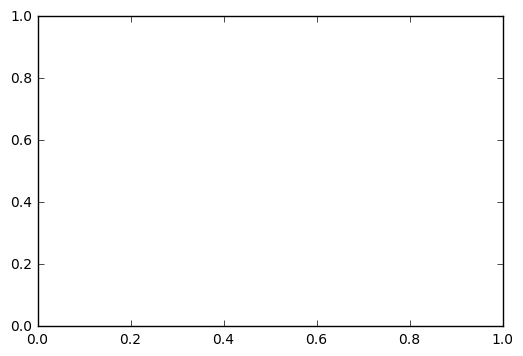

In [136]:
#plt.hist(np.array([ float(x) for x in X['comments'] ]),bins = 50)

In [137]:
bow = vect.transform(X['tagset'])

In [139]:
mask = bow.sum(axis=1)  > 0

In [140]:
mask.shape

(1760855, 1)

In [144]:
X_popular = X[mask]

In [153]:
from scipy.sparse import csr_matrix

def feature_transform(text,vect):
    
    X = []
    vocab = vect.vocabulary_
    
    for i in range(len(text)):
        index = []
        doc = text[i]
        for word in doc.split(','):
            if word in vocab:
                index.append(vocab[word])
        X.append(index)
    
    
    return X
    
features = feature_transform(list(X_popular['tagset']),vect)

In [154]:
features[0:10]

[[536, 600, 522],
 [536, 522],
 [600],
 [536, 522],
 [536, 522],
 [536, 522],
 [536, 522],
 [536, 522],
 [522],
 [278]]

In [150]:
from scipy.sparse import csr_matrix

nonzero = bow.nonzero()


In [151]:
nonzero[0].shape

(5120229,)

In [155]:
X.shape

(1760855, 7)

In [158]:
X.to_csv('media_fixed.csv',index=False,sep=';',encoding = "ISO-8859-1")